# Project

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd

%matplotlib inline

In [189]:
DATA_PATH = 'data'

In [340]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK&STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'cLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [190]:
def append_arrays(data_array):
    data = data_array[0]
    for i in range(1, len(data_array)):
        data = np.concatenate((data, data_array[i]), axis=0)
    return data

In [191]:
def get_user_data(user_id=None, user_path=None):
    """
    reads user data from all files and appends it to just one

    """
    if user_path is None:
        folder_path = f'part{user_id}'
        path = os.path.join(DATA_PATH, folder_path)
    else:
        path = os.path.join(DATA_PATH, user_path)
    files_names = os.listdir(path)
    data_array = []
    for i in range(1, len(files_names)):
        if files_names[i].startswith('part'):
            data_path = os.path.join(path, files_names[i])
            aux = np.genfromtxt(data_path, delimiter=',')
            data_array += [aux]
            print(files_names[i], aux.shape)
    data = append_arrays(data_array)
    return data

In [192]:
data_user_0 = get_user_data(user_id=0)

part0dev1.csv (53120, 12)
part0dev2.csv (52864, 12)
part0dev3.csv (53120, 12)
part0dev4.csv (53120, 12)
part0dev5.csv (53120, 12)


In [193]:
def get_all_data():
    users_list = os.listdir(DATA_PATH)
    data_array = []
    for user_path in users_list:
        if user_path.startswith('part'):
            data_array += [get_user_data(user_path=user_path)]

    data = append_arrays(data_array)
    return data

In [194]:
# dataset = get_all_data()

In [195]:
#dataset.shape

In [321]:
# convert numpy array to pandas to analyse more easily

def to_pandas_dataframe(dataset):
    columns = ['device_id', 
        'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
        'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
        'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
        'timestamp', 'activity'
    ]

    data = pd.DataFrame(data=dataset, columns=columns)
    data['device_id'] = data['device_id'].astype('int64')
    data['activity'] = data['activity'].astype('int64')
    return data

In [322]:
data = to_pandas_dataframe(data_user_0)

In [323]:
data.dtypes

device_id            int64
accelerometer_x    float64
accelerometer_y    float64
accelerometer_z    float64
gyroscope_x        float64
gyroscope_y        float64
gyroscope_z        float64
magnetometer_x     float64
magnetometer_y     float64
magnetometer_z     float64
timestamp          float64
activity             int64
dtype: object

In [324]:
data.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,265344.000000,265344.000000,265344.000000,265344.000000,265344.000000,265344.000000,265344.000000,265344.000000,265344.000000,265344.00000,2.653440e+05,265344.000000
mean,3.000965,0.107497,8.509903,2.469700,-0.057952,0.380503,0.026642,-0.082464,0.477239,0.43086,5.194220e+05,4.025612
std,1.414557,2.408684,3.106417,3.679298,37.547881,47.779915,41.575892,0.473925,0.453306,0.67466,2.995185e+05,2.581042
min,1.000000,-24.622000,-14.622000,-23.241000,-267.800000,-505.220000,-324.460000,-1.452500,-0.681430,-1.40000,6.362900e+01,1.000000
25%,2.000000,-1.347500,8.198100,-0.367673,-4.022525,-6.055725,-1.984150,-0.441530,0.263392,-0.18931,2.600475e+05,2.000000
50%,3.000000,-0.232695,9.302200,2.409450,-0.065761,-0.206020,-0.002328,-0.103240,0.576310,0.52561,5.192850e+05,4.000000
75%,4.000000,1.708000,9.783000,3.748300,5.822025,3.975575,3.419400,0.262100,0.818360,0.95281,7.786725e+05,5.000000
max,5.000000,25.381000,24.996000,24.585000,315.170000,502.200000,474.160000,1.439800,1.523800,1.89910,1.039400e+06,16.000000


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265344 entries, 0 to 265343
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   device_id        265344 non-null  int64  
 1   accelerometer_x  265344 non-null  float64
 2   accelerometer_y  265344 non-null  float64
 3   accelerometer_z  265344 non-null  float64
 4   gyroscope_x      265344 non-null  float64
 5   gyroscope_y      265344 non-null  float64
 6   gyroscope_z      265344 non-null  float64
 7   magnetometer_x   265344 non-null  float64
 8   magnetometer_y   265344 non-null  float64
 9   magnetometer_z   265344 non-null  float64
 10  timestamp        265344 non-null  float64
 11  activity         265344 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 24.3 MB


In [326]:
data.count()

device_id          265344
accelerometer_x    265344
accelerometer_y    265344
accelerometer_z    265344
gyroscope_x        265344
gyroscope_y        265344
gyroscope_z        265344
magnetometer_x     265344
magnetometer_y     265344
magnetometer_z     265344
timestamp          265344
activity           265344
dtype: int64

In [327]:
data.columns

Index(['device_id', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
       'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'timestamp', 'activity'],
      dtype='object')

In [328]:
def append_metrics(dataset):
    data = dataset.copy()
    data['accelerometer_module'] = np.sqrt(data['accelerometer_x']**2 + data['accelerometer_y']**2 + data['accelerometer_z']**2)
    data['gyroscope_module'] = np.sqrt(data['gyroscope_x']**2 + data['gyroscope_y']**2 + data['gyroscope_z']**2)
    data['magnetometer_module'] = np.sqrt(data['magnetometer_x']**2 + data['magnetometer_y']**2 + data['magnetometer_z']**2)

    return data

In [329]:
data_with_features = append_metrics(data)

## Boxplot of the vector modules grouped by activity

In [330]:
def boxplot_features(data, title=None):
    # box plot accelerometer data
    plt.figure(figsize=(21, 10))
    data.boxplot(column=['accelerometer_module'], by='activity')
    if title:
        plt.title('accelerometer - ' + title)
    plt.show()
    # box plot gyroscope data
    plt.figure(figsize=(21, 10))
    data.boxplot(column=['gyroscope_module'], by='activity')
    if title:
        plt.title('gyroscope - ' + title)
    plt.show()
    # box plot magnetometer data
    plt.figure(figsize=(21, 10))
    data.boxplot(column=['magnetometer_module'], by='activity')
    if title:
        plt.title('magnetometer - ' + title)
    plt.show()

<Figure size 2100x1000 with 0 Axes>

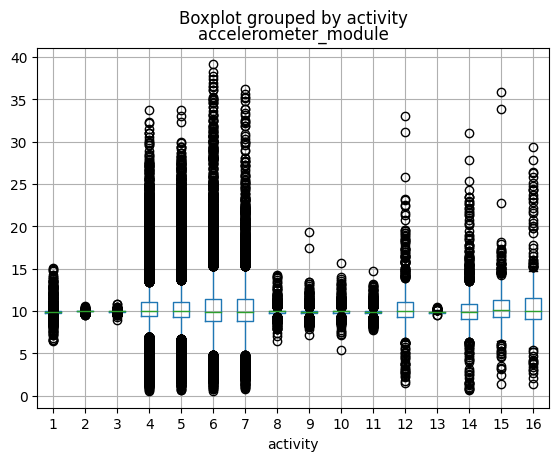

<Figure size 2100x1000 with 0 Axes>

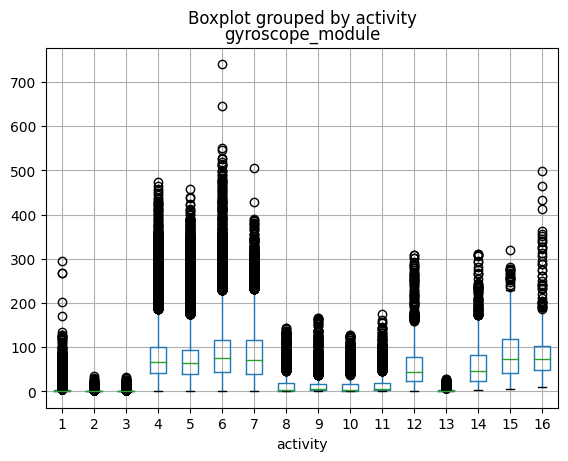

<Figure size 2100x1000 with 0 Axes>

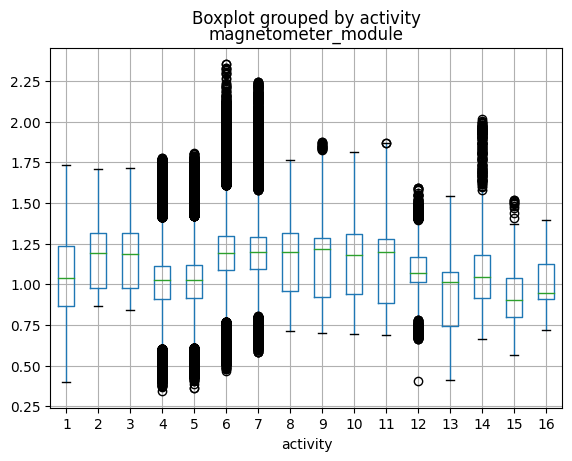

In [331]:
boxplot_features(data_with_features)

## Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

In [332]:
devices_id = data_with_features['device_id'].unique() # gett all the different devices available

<Figure size 2100x1000 with 0 Axes>

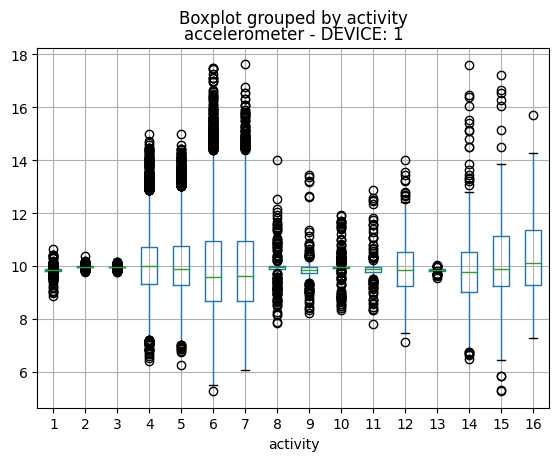

<Figure size 2100x1000 with 0 Axes>

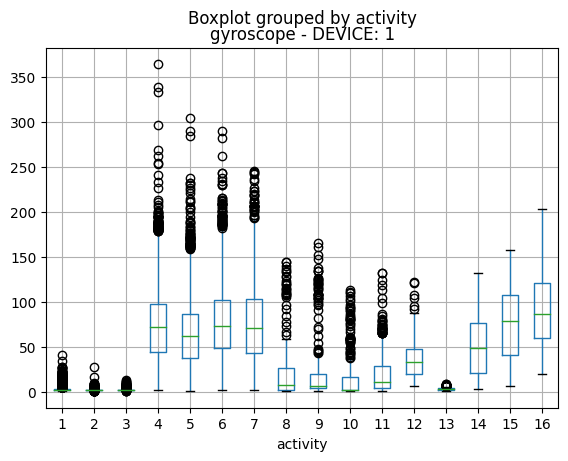

<Figure size 2100x1000 with 0 Axes>

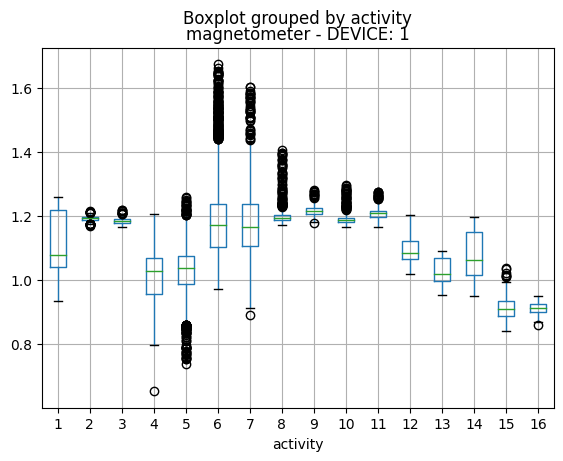

<Figure size 2100x1000 with 0 Axes>

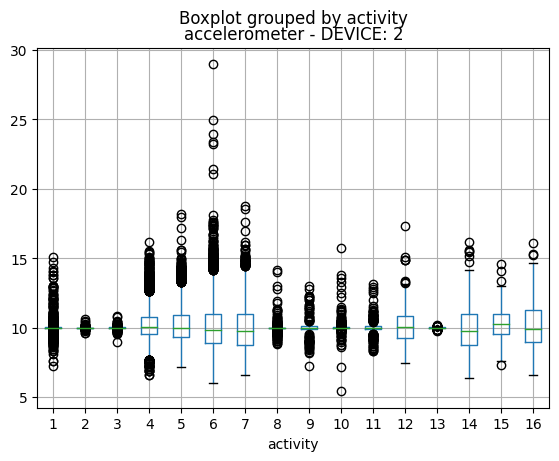

<Figure size 2100x1000 with 0 Axes>

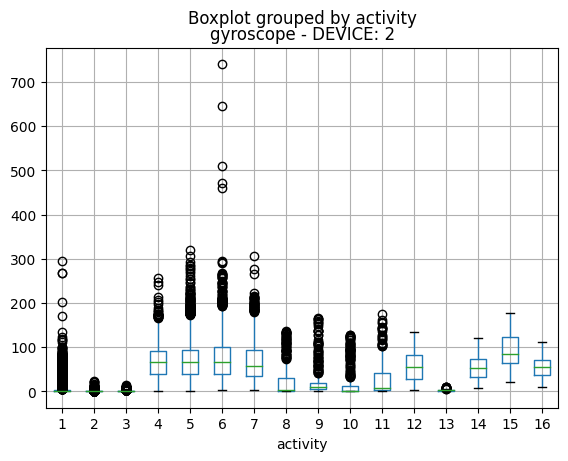

<Figure size 2100x1000 with 0 Axes>

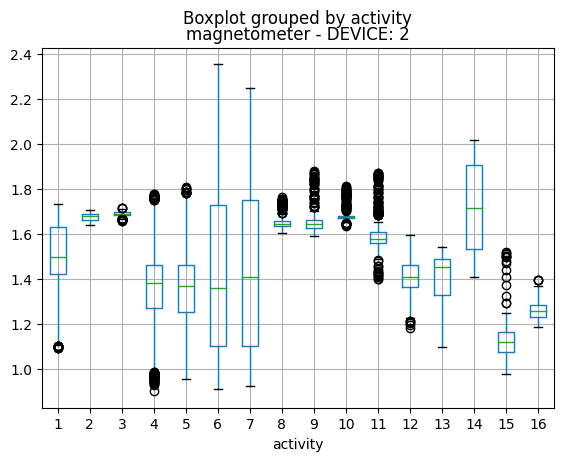

<Figure size 2100x1000 with 0 Axes>

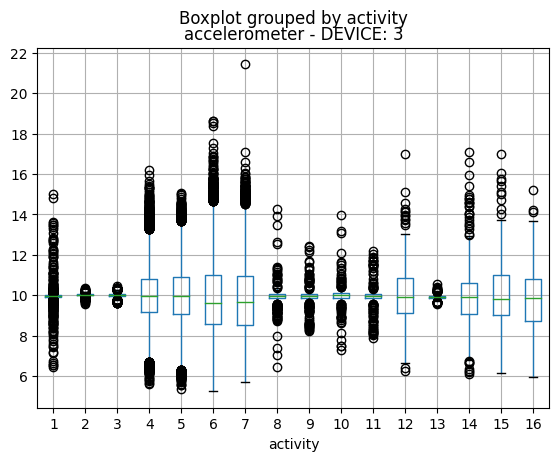

<Figure size 2100x1000 with 0 Axes>

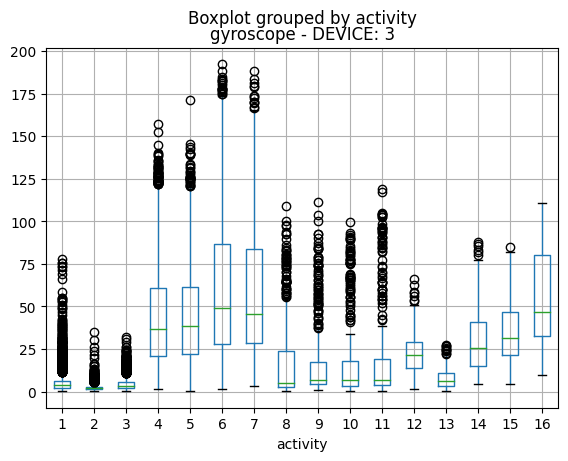

<Figure size 2100x1000 with 0 Axes>

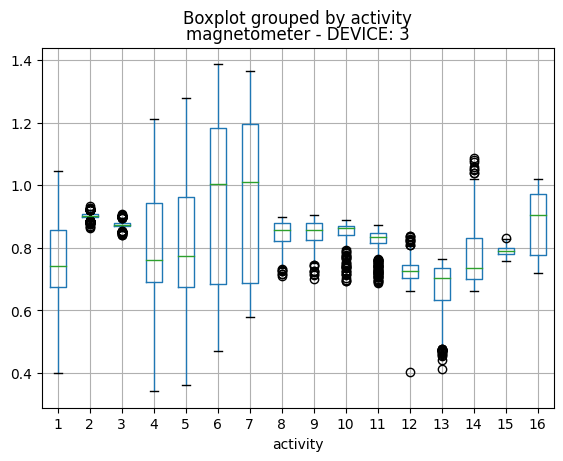

<Figure size 2100x1000 with 0 Axes>

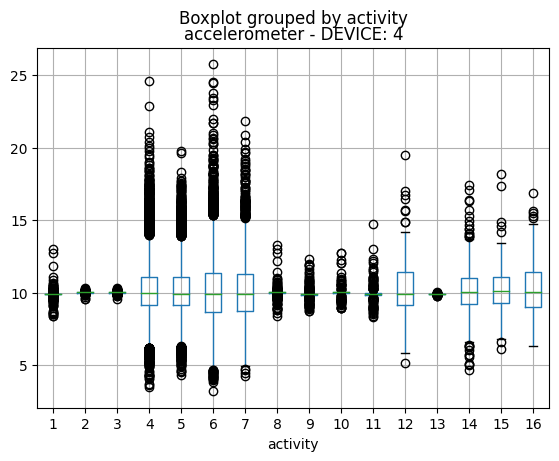

<Figure size 2100x1000 with 0 Axes>

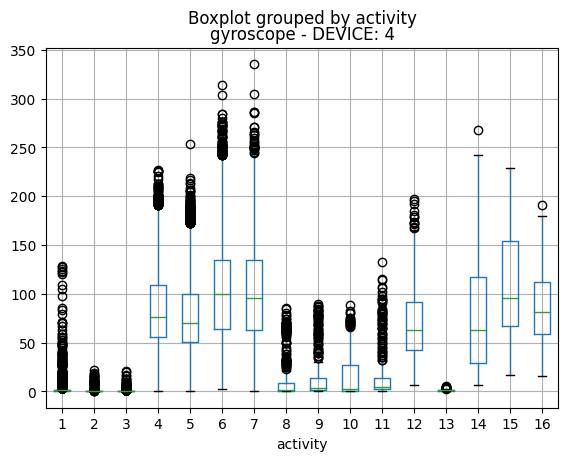

<Figure size 2100x1000 with 0 Axes>

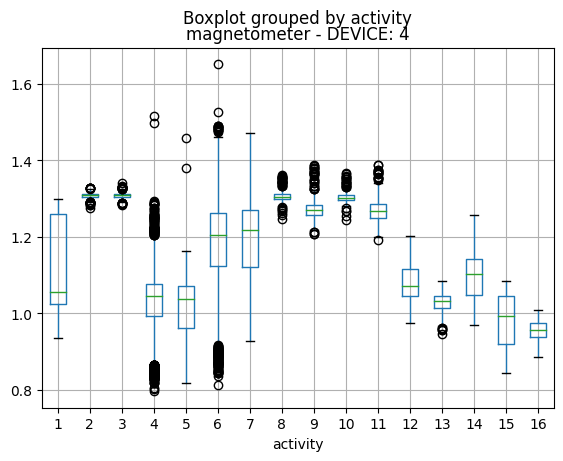

<Figure size 2100x1000 with 0 Axes>

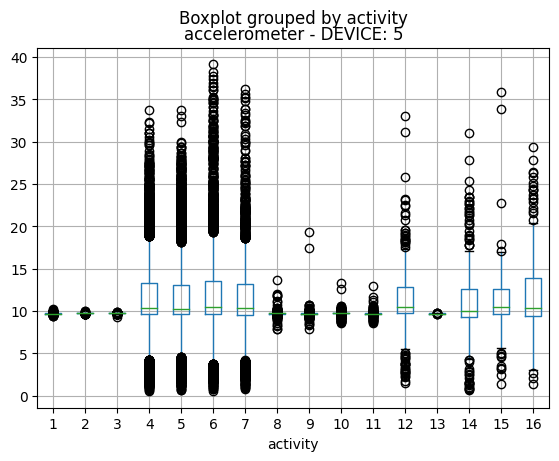

<Figure size 2100x1000 with 0 Axes>

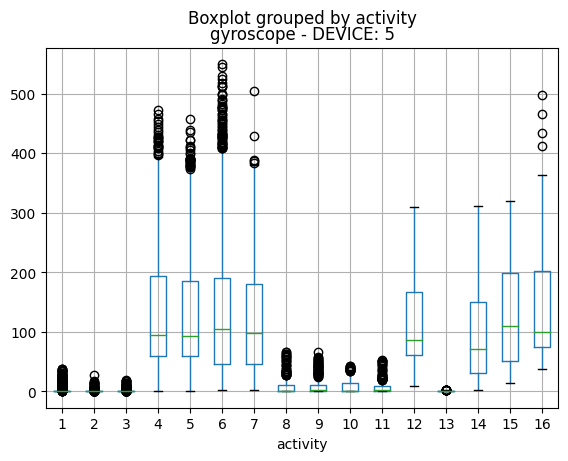

<Figure size 2100x1000 with 0 Axes>

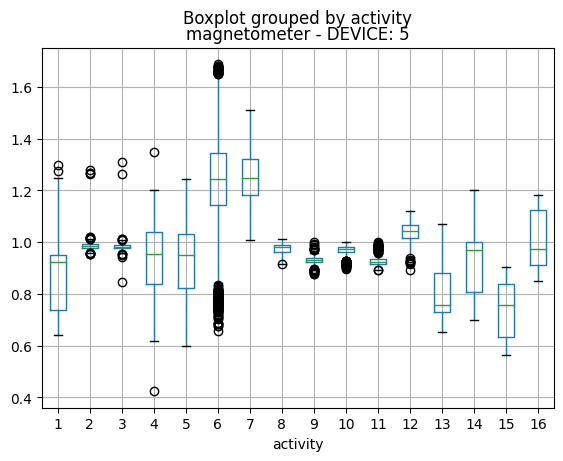

In [333]:
# plots the information for each device
for device in devices_id:
    device_data = data_with_features.loc[data_with_features['device_id'] == device]
    boxplot_features(device_data, title=f'DEVICE: {device}')

### Plot of the right wrist (id = 2)

In [334]:
right_wrist_id = 2
right_wrist_data = data_with_features[data_with_features['device_id'] == right_wrist_id][['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]

<Figure size 2100x1000 with 0 Axes>

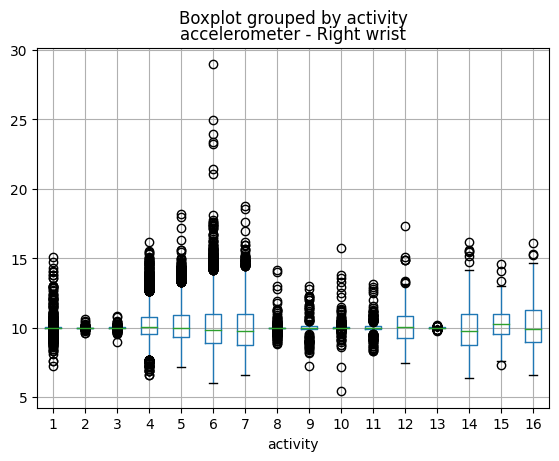

<Figure size 2100x1000 with 0 Axes>

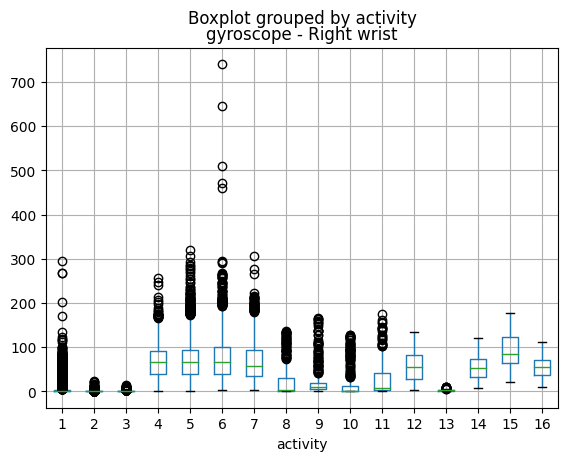

<Figure size 2100x1000 with 0 Axes>

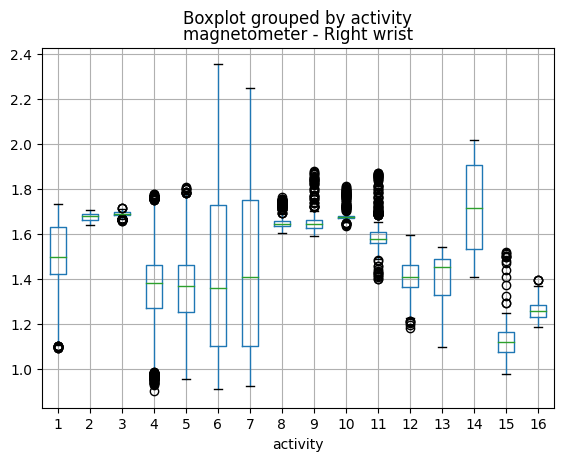

In [335]:
boxplot_features(right_wrist_data, title='Right wrist')

In [336]:
right_wrist_data.describe()

,accelerometer_module,gyroscope_module,magnetometer_module,activity
count,52864.000000,52864.000000,52864.000000,52864.000000
mean,10.111320,38.729835,1.476594,4.022321
std,1.066517,44.666545,0.229939,2.586555
min,5.424999,0.015259,0.901666,1.000000
25%,9.865237,1.274141,1.305570,2.000000
50%,10.002429,20.214120,1.499769,4.000000
75%,10.130922,69.784923,1.673832,5.000000
max,28.986407,740.443292,2.353209,16.000000


## Density

In [337]:
def calculate_density(data, activity=None):
    first_quatile_accelerometer = data['accelerometer_module'].quantile(0.25)
    third_quantile_accelerometer = data['accelerometer_module'].quantile(0.75)
    first_quatile_gyroscope = data['gyroscope_module'].quantile(0.25)
    third_quantile_gyroscope = data['gyroscope_module'].quantile(0.75)
    first_quatile_magnetometer = data['magnetometer_module'].quantile(0.25)
    third_quantile_magnetometer = data['magnetometer_module'].quantile(0.75)

    accelerometer_median = data['accelerometer_module'].median()
    gyroscope_median = data['gyroscope_module'].median()
    magnetometer_median = data['magnetometer_module'].median()


    accelerometer_outliers = data[data['accelerometer_module'] < (first_quatile_accelerometer - 1.5*accelerometer_median)]['accelerometer_module'].count() + data[data['accelerometer_module'] > (third_quantile_accelerometer + 1.5*accelerometer_median)]['accelerometer_module'].count()
    gyroscope_outliers = data[data['gyroscope_module'] < (first_quatile_gyroscope - 1.5*gyroscope_median)]['gyroscope_module'].count() + data[data['gyroscope_module'] > (third_quantile_gyroscope + 1.5*gyroscope_median)]['gyroscope_module'].count()
    magnetometer_outliers = data[data['magnetometer_module'] < (first_quatile_magnetometer - 1.5*magnetometer_median)]['magnetometer_module'].count() + data[data['magnetometer_module'] > (third_quantile_magnetometer + 1.5* magnetometer_median)]['magnetometer_module'].count()

    data_size = data['magnetometer_module'].count()

    accelerometer_density = accelerometer_outliers / data_size
    gyroscope_density = gyroscope_outliers / data_size
    magnetometer_outliers = gyroscope_outliers / data_size
    print(f'{activity} Accelometer density: {accelerometer_density}') 
    print(f'{activity} Gyroscope density: {gyroscope_density}') 
    print(f'{activity} Magnometer density: {accelerometer_density}') 


In [344]:
def calculate_density_by_activity(data):
    activities = data['activity'].unique()
    for activity in activities:
        activity_data = data[data['activity'] == activity]
        calculate_density(activity_data, activity=activities_labels[activity])

In [345]:
calculate_density_by_activity(right_wrist_data)
# todo plot with the results

STAND Accelometer density: 0.0
STAND Gyroscope density: 0.09144569560479476
STAND Magnometer density: 0.0
STAND_TO_SIT Accelometer density: 0.0
STAND_TO_SIT Gyroscope density: 0.23697916666666666
STAND_TO_SIT Magnometer density: 0.0
SIT Accelometer density: 0.0
SIT Gyroscope density: 0.057118055555555554
SIT Magnometer density: 0.0
SIT_TO_STAND Accelometer density: 0.0
SIT_TO_STAND Gyroscope density: 0.19010416666666666
SIT_TO_STAND Magnometer density: 0.0
STAND_TO_SIT&TALK Accelometer density: 0.0
STAND_TO_SIT&TALK Gyroscope density: 0.23958333333333334
STAND_TO_SIT&TALK Magnometer density: 0.0
SIT&TALK Accelometer density: 0.0
SIT&TALK Gyroscope density: 0.0625
SIT&TALK Magnometer density: 0.0
SIT&TALK_TO_STAND Accelometer density: 0.0
SIT&TALK_TO_STAND Gyroscope density: 0.171875
SIT&TALK_TO_STAND Magnometer density: 0.0
STAND_TO_WALK Accelometer density: 0.0
STAND_TO_WALK Gyroscope density: 0.0
STAND_TO_WALK Magnometer density: 0.0
WALK Accelometer density: 0.0
WALK Gyroscope densi